**Integrantes:**

*   Jenniffer Karola Beltran Lopez
*   Francisco Danilo Arteaga Guardado


**Algoritmos de reducción de dimensionalidad - PCA**


Los algoritmos de reducción de dimensionalidad - PCA son utiles en diversas aplicaciones, como la visualización de datos de alta dimensionalidad, la eliminación de variables redundantes, la compresión de datos y la detección de patrones en los datos. Además, puede ser utilizado como una etapa previa en otros algoritmos de aprendizaje automático para mejorar el rendimiento y reducir el tiempo de procesamiento.

**Codigo Fuente**

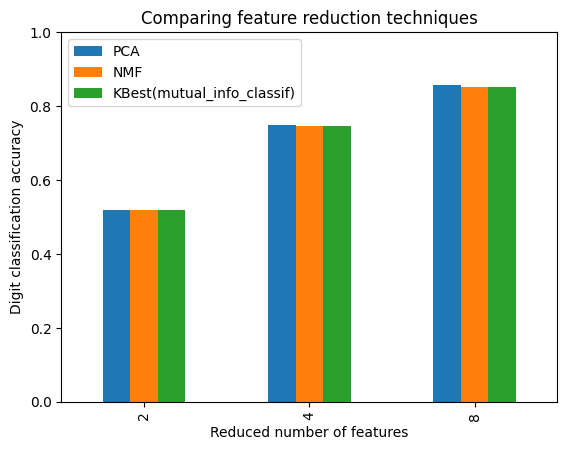

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

X, y = load_digits(return_X_y=True)

pipe = Pipeline(
    [
        ("scaling", MinMaxScaler()),
        # the reduce_dim stage is populated by the param_grid
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000)],
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(mutual_info_classif)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "NMF", "KBest(mutual_info_classif)"]

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)
grid.fit(X, y)

import pandas as pd

mean_scores = np.array(grid.cv_results_["mean_test_score"])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
# create a dataframe to ease plotting
mean_scores = pd.DataFrame(
    mean_scores.T, index=N_FEATURES_OPTIONS, columns=reducer_labels
)

ax = mean_scores.plot.bar()
ax.set_title("Comparing feature reduction techniques")
ax.set_xlabel("Reduced number of features")
ax.set_ylabel("Digit classification accuracy")
ax.set_ylim((0, 1))
ax.legend(loc="upper left")

plt.show()

**Explicación de resultados de la implementación del algoritmo**

En esta implementación se grafican los puntajes promedio en forma de gráfico de barras para comparar las técnicas de reducción de dimensionalidad. En el eje x se muestra el número reducido de características y en el eje y se muestra la precisión de clasificación de los dígitos. Cada técnica de reducción de dimensionalidad (PCA, NMF, KBest) se representa con un color diferente en la gráfica. El código muestra cómo se puede utilizar scikit-learn para comparar diferentes algoritmos de reducción de dimensionalidad y seleccionar la técnica más adecuada para un problema específico.